In [31]:
import open3d as o3d
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
sys.path.append('..')
import open3d_tutorial as o3dtut
o3dtut.interactive =not 'CI' in os.environ

In [37]:
color_img = o3d.io.read_image('./data/color.png')
depth_img = o3d.io.read_image('./data/depth.png')

In [38]:
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(color_img,depth_img,convert_rgb_to_intensity=False)
print(rgbd_image)

RGBDImage of size 
Color image : 256x192, with 3 channels.
Depth image : 256x192, with 1 channels.
Use numpy.asarray to access buffer data.


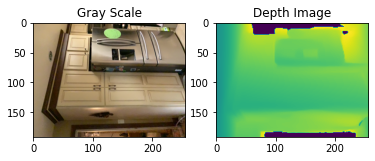

In [39]:
plt.subplot(1,2,1)
plt.title("Gray Scale")
plt.imshow(rgbd_image.color)
plt.subplot(1,2,2)
plt.title("Depth Image")
plt.imshow(rgbd_image.depth)
plt.show()

In [40]:
pcd =o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault
    )
)

In [41]:
transform_matrix = [[1,0,0,0],
                    [0,-1,0,0],
                    [0,0,-1,0],
                    [0,0,0,1]]

In [42]:
pcd.transform(transform_matrix)

PointCloud with 46102 points.

In [43]:
o3d.visualization.draw_geometries([pcd])